In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel

enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
enter /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler get_tree_sampler
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer __init__
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers

Text(0.5, 1.0, 'X v y')

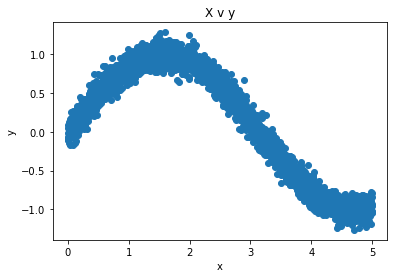

In [2]:
count = 3000
x = np.linspace(0, 5, count)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=count) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [3]:
kwargs = {
    "model": "causal_gaussian_mixture"
}
model = SklearnModel(
    n_samples=3,#1000, 
    n_burn=1,#200, 
    n_trees=1,#100, 
    n_chains=1,#4,
    n_jobs=-1,
    store_in_sample_predictions=False,
    **kwargs
)

enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
Causal Gaussian Mixture using Transformed Outcomes...
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
enter bartpy/bartpy/samplers/modelsampler.py ModelSamplerCGM __init__
-exit bartpy/bartpy/samplers/modelsampler.py ModelSamplerCGM __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__


In [4]:
p = np.random.uniform(len(y))
W = np.random.binomial(n =1, p=.4, size = len(y))
model.fit_CGM(X, y, W, p)
#model.fit(X, y)

enter bartpy/bartpy/sklearnmodel.py SklearnModel fit_CGM
enter bartpy/bartpy/sklearnmodel.py SklearnModel _construct_model_cgm
enter bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
enter bartpy/bartpy/data.py Data __init__
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
enter bartpy/bartpy/data.py CovariateMatrix __init__
-exit bartpy/bartpy/data.py CovariateMatrix __init__
enter bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py TreatmentAssignment __init__
-exit bartpy/bartpy/data.py TreatmentAssignment __init__
enter bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py Data __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
enter bartpy/bartpy/data.py Data y
-exit ba

AttributeError: 'ModelCGM' object has no attribute 'sigma'

In [ ]:
pred = model.predict_cgm(X)
#score = model.score(X, y)

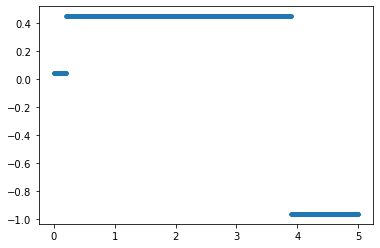

In [6]:
plt.plot(X, pred, '.')

Will probably need to add methods for h(x) and g(x)

In [5]:
bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio
bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_grow
bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_prune
bartpy/bartpy/samplers/treemutation.py TreeMutationLikihoodRatio log_probability_ratio

SyntaxError: invalid syntax (<ipython-input-5-1930e2c22f17>, line 1)

In [ ]:
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/sklearnmodel.py", 
line 47, in run_chain_cgm
    output = model.sampler.samples(model.model,
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/modelsampler.py", 
line 115, in samples
    self.step(model, trace_logger)
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/modelsampler.py", 
line 94, in step
    result = step()
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/schedule.py", 
line 104, in <lambda>
    yield "Tree", lambda: self.tree_sampler.step(model, tree)
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/unconstrainedtree/treemutation.py", 
line 54, in step #  in function model is of type Model we need ModelCGM
    mutation = self.sample(model, tree) 
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/unconstrainedtree/treemutation.py", 
line 43, in sample # model is of type Model we need ModelCGM
    ratio = self.likihood_ratio.log_probability_ratio(model, tree, proposal)
    
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/treemutation.py", 
line 84, in log_probability_ratio # in function model is of type Model we need ModelCGM
    output = self.log_transition_ratio(tree, mutation) + 
                self.log_likihood_ratio(model, tree, mutation) + 
                self.log_tree_ratio(model, tree, mutation) 
    
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py", 
line 81, in log_likihood_ratio # in function model is of type Model we need ModelCGM
    output = self.log_likihood_ratio_grow(model, proposal)
                                   
File "/Users/omarchavez/UT/CausalDART/bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py", 
line 96, in log_likihood_ratio_grow # in function model is of type Model we need ModelCGM
    output = log_grow_ratio(
        proposal.existing_node, 
        proposal.updated_node.left_child, 
        proposal.updated_node.right_child, 
        model.sigma, model.sigma_m)

AttributeError: 'ModelCGM' object has no attribute 'sigma'